# 

Jupyter analysis notebook for analyzing differential selection data
using `dmslogo` software for logoplot generation.

#### Import Packages

In [24]:
# Logoplot Generation
import os
import random

from IPython.display import display, Image

import matplotlib.pyplot as plt

import numpy

import pandas as pd

import dmslogo
from dmslogo.colorschemes import CBPALETTE

In [25]:
# Set preferences for logoplot displays
pd.set_option("display.max_columns", 20)
pd.set_option("display.width", 500)

#### Import Data

In [26]:
data_chk11 = (pd.read_csv('~/dms_data/summary_CHK-11-meanmutdiffsel.csv'))

data_chk11 = data_chk11.sort_values(by=['site', 'mutation'])

data_chk11

7410 rows × 4 columns

In [27]:
data_chk152 = (pd.read_csv('~/dms_data/summary_CHK-152-meanmutdiffsel.csv'))

data_chk152 = data_chk152.sort_values(by=['site', 'mutation'])

data_chk152

7800 rows × 4 columns

In [28]:
data_chk265 = (pd.read_csv('~/dms_data/summary_CHK-265-meanmutdiffsel.csv'))

data_chk265 = data_chk265.sort_values(by=['site', 'mutation'])

data_chk265

7800 rows × 4 columns

#### Identify Sites for Plotting

In [29]:
# Just showing sites we chose to mutate (using p62 numbering)
sites = list([40]+[49]+[139]+[143]+[243]+[283]+[305])
sites152 = list([75]+[123]+[138]+[257]+[258]+[276]+[296]+[297]+[299])
sites265 = list([88]+[90]+[91]+[92]+[93]+[121]+[122]+[123]+[128]+[129]+[136]+[137]+[138]+[141]+[143]+[145]+[146]+[148]+[150]+[152]+[154]+[156]+[157]+[168]+[171]+[173]+[174]+[183]+[184]+[185]+[186]+[247]+[248]+[249]+[250]+[251]+[253]+[254]+[257]+[258]+[261]+[263]+[267]+[268]+[269]+[270]+[272]+[273]+[274]+[276]+[277]+[278]+[279]+[280]+[281]+[282]+[283]+[284]+[285])

# Extract those sites
zoomed_df_11 = (data_chk11.loc[data_chk11['site'].isin(sites)]
                )
# Renumber based on E3/E2 numbering not p62 numbering (E3 numbering maintained, E2 changed)
zoomed_df_11 = zoomed_df_11.replace(143, 79)
zoomed_df_11 = zoomed_df_11.replace(305, 241)
zoomed_df_11 = zoomed_df_11.replace(139, 75)
zoomed_df_11 = zoomed_df_11.replace(243, 179)
zoomed_df_11 = zoomed_df_11.replace(283, 219)

# Combine new numbering with wildtype reside for label
zoomed_df_11 = zoomed_df_11.assign(site_label = lambda x: x['wildtype'] + x['site'].astype(str))

zoomed_df_11

133 rows × 5 columns

In [30]:
zoomed_df_152 = (data_chk152.loc[data_chk152['site'].isin(sites)]
                )

zoomed_df_152 = zoomed_df_152.replace(143, 79)
zoomed_df_152 = zoomed_df_152.replace(305, 241)
zoomed_df_152 = zoomed_df_152.replace(139, 75)
zoomed_df_152 = zoomed_df_152.replace(243, 179)
zoomed_df_152 = zoomed_df_152.replace(283, 219)

zoomed_df_152 = zoomed_df_152.assign(site_label = lambda x: x['wildtype'] + x['site'].astype(str))

zoomed_df_152

140 rows × 5 columns

In [31]:
contacts_df_152 = (data_chk152.loc[data_chk152['site'].isin(sites152)]
                )

contacts_df_152 = contacts_df_152.replace(75, 11)
contacts_df_152 = contacts_df_152.replace(123, 59)
contacts_df_152 = contacts_df_152.replace(138, 74)
contacts_df_152 = contacts_df_152.replace(257, 193)
contacts_df_152 = contacts_df_152.replace(258, 194)
contacts_df_152 = contacts_df_152.replace(276, 212)
contacts_df_152 = contacts_df_152.replace(296, 232)
contacts_df_152 = contacts_df_152.replace(299, 235)
contacts_df_152 = contacts_df_152.replace(297, 233)

contacts_df_152 = contacts_df_152.assign(site_label = lambda x: x['wildtype'] + x['site'].astype(str))

contacts_df_152

180 rows × 5 columns

In [32]:
zoomed_df_265 = (data_chk265.loc[data_chk265['site'].isin(sites)]
                )

zoomed_df_265 = zoomed_df_265.replace(143, 79)
zoomed_df_265 = zoomed_df_265.replace(305, 241)
zoomed_df_265 = zoomed_df_265.replace(139, 75)
zoomed_df_265 = zoomed_df_265.replace(243, 179)
zoomed_df_265 = zoomed_df_265.replace(283, 219)

zoomed_df_265 = zoomed_df_265.assign(site_label = lambda x: x['wildtype'] + x['site'].astype(str))

zoomed_df_265

140 rows × 5 columns

In [33]:
contacts_df_265 = (data_chk265.loc[data_chk265['site'].isin(sites265)]
                )

contacts_df_265 = contacts_df_265.replace(88,24)
contacts_df_265 = contacts_df_265.replace(90,26)
contacts_df_265 = contacts_df_265.replace(91,27)
contacts_df_265 = contacts_df_265.replace(92,28)
contacts_df_265 = contacts_df_265.replace(93,29)
contacts_df_265 = contacts_df_265.replace(121,57)
contacts_df_265 = contacts_df_265.replace(122,58)
contacts_df_265 = contacts_df_265.replace(123,59)
contacts_df_265 = contacts_df_265.replace(128,64)
contacts_df_265 = contacts_df_265.replace(129,65)
contacts_df_265 = contacts_df_265.replace(136,72)
contacts_df_265 = contacts_df_265.replace(137,73)
contacts_df_265 = contacts_df_265.replace(138,74)
contacts_df_265 = contacts_df_265.replace(141,77)
contacts_df_265 = contacts_df_265.replace(143,79)
contacts_df_265 = contacts_df_265.replace(145,81)
contacts_df_265 = contacts_df_265.replace(146,82)
contacts_df_265 = contacts_df_265.replace(148,84)
contacts_df_265 = contacts_df_265.replace(150,86)
contacts_df_265 = contacts_df_265.replace(152,88)
contacts_df_265 = contacts_df_265.replace(154,90)
contacts_df_265 = contacts_df_265.replace(156,92)
contacts_df_265 = contacts_df_265.replace(157,93)
contacts_df_265 = contacts_df_265.replace(168,104)
contacts_df_265 = contacts_df_265.replace(171,107)
contacts_df_265 = contacts_df_265.replace(173,109)
contacts_df_265 = contacts_df_265.replace(174,110)
contacts_df_265 = contacts_df_265.replace(183,119)
contacts_df_265 = contacts_df_265.replace(184,120)
contacts_df_265 = contacts_df_265.replace(185,121)
contacts_df_265 = contacts_df_265.replace(186,122)
contacts_df_265 = contacts_df_265.replace(247,183)
contacts_df_265 = contacts_df_265.replace(248,184)
contacts_df_265 = contacts_df_265.replace(249,185)
contacts_df_265 = contacts_df_265.replace(250,186)
contacts_df_265 = contacts_df_265.replace(251,187)
contacts_df_265 = contacts_df_265.replace(253,189)
contacts_df_265 = contacts_df_265.replace(254,190)
contacts_df_265 = contacts_df_265.replace(257,193)
contacts_df_265 = contacts_df_265.replace(258,194)
contacts_df_265 = contacts_df_265.replace(261,197)
contacts_df_265 = contacts_df_265.replace(263,199)
contacts_df_265 = contacts_df_265.replace(267,203)
contacts_df_265 = contacts_df_265.replace(268,204)
contacts_df_265 = contacts_df_265.replace(269,205)
contacts_df_265 = contacts_df_265.replace(270,206)
contacts_df_265 = contacts_df_265.replace(272,208)
contacts_df_265 = contacts_df_265.replace(273,209)
contacts_df_265 = contacts_df_265.replace(274,210)
contacts_df_265 = contacts_df_265.replace(276,212)
contacts_df_265 = contacts_df_265.replace(277,213)
contacts_df_265 = contacts_df_265.replace(278,214)
contacts_df_265 = contacts_df_265.replace(279,215)
contacts_df_265 = contacts_df_265.replace(280,216)
contacts_df_265 = contacts_df_265.replace(281,217)
contacts_df_265 = contacts_df_265.replace(282,218)
contacts_df_265 = contacts_df_265.replace(283,219)
contacts_df_265 = contacts_df_265.replace(284,220)
contacts_df_265 = contacts_df_265.replace(285,221)

contacts_df_265 = contacts_df_265.assign(site_label = lambda x: x['wildtype'] + x['site'].astype(str))

contacts_df_265

1180 rows × 5 columns

In [34]:
# Exclude all non positive mutdiffsel scores
zoomed_df_11['mutdiffsel'] = zoomed_df_11['mutdiffsel'].mask(zoomed_df_11['mutdiffsel'].lt(0),0)

zoomed_df_152['mutdiffsel'] = zoomed_df_152['mutdiffsel'].mask(zoomed_df_152['mutdiffsel'].lt(0),0)

contacts_df_152['mutdiffsel'] = contacts_df_152['mutdiffsel'].mask(contacts_df_152['mutdiffsel'].lt(0),0)

zoomed_df_265['mutdiffsel'] = zoomed_df_265['mutdiffsel'].mask(zoomed_df_265['mutdiffsel'].lt(0),0)

contacts_df_265['mutdiffsel'] = contacts_df_265['mutdiffsel'].mask(contacts_df_265['mutdiffsel'].lt(0),0)

In [35]:
contacts_df_265_adom = contacts_df_265[contacts_df_265['site'] <= 134]
contacts_df_265_bdom = contacts_df_265[contacts_df_265['site'] >= 135]

contacts_df_265_adom

620 rows × 5 columns

In [36]:
contacts_df_265_bdom

560 rows × 5 columns

In [ ]:
# Append antibody/domain info to each dataframe then combine
## ZOOMED
zoomed_df_11['antibody'] = 'CHK-11'
zoomed_df_152['antibody'] = 'CHK-152'
zoomed_df_265['antibody'] = 'CHK-265'

display(zoomed_df_11)
display(zoomed_df_152)
display(zoomed_df_265)

133 rows × 6 columns

140 rows × 6 columns

140 rows × 6 columns

In [38]:
zoomed_df_concat = pd.concat([zoomed_df_11, zoomed_df_152, zoomed_df_265], axis = 0)
print("After merging:")
display(zoomed_df_concat)

After merging:

413 rows × 6 columns

In [39]:
# Append antibody/domain info to each dataframe then combine
# CONTACTS
contacts_df_152['antibody'] = 'CHK-152'
contacts_df_265_adom['antibody'] = 'CHK-265 (A domain)'
contacts_df_265_bdom['antibody'] = 'CHK-265 (B domain)'

display(contacts_df_152)
display(contacts_df_265_adom)
display(contacts_df_265_bdom)

/var/folders/42/lk7h5l9s4gg49b0x2tkpx0kh0000gn/T/ipykernel_39358/4275625501.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contacts_df_265_adom['antibody'] = 'CHK-265 (A domain)'
/var/folders/42/lk7h5l9s4gg49b0x2tkpx0kh0000gn/T/ipykernel_39358/4275625501.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contacts_df_265_bdom['antibody'] = 'CHK-265 (B domain)'

180 rows × 6 columns

620 rows × 6 columns

560 rows × 6 columns

In [40]:
contacts_df_concat = pd.concat([contacts_df_152, contacts_df_265_adom, contacts_df_265_bdom], axis = 0)
print("After merging:")
display(contacts_df_concat)

After merging:

1360 rows × 6 columns

#### Plot logoplots using `dmslogo`

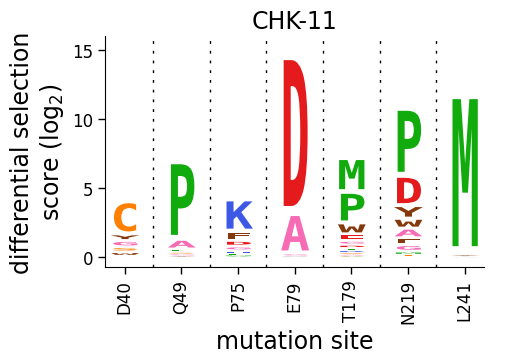

In [41]:
# Draw logoplot for each antibody
ylim_setter = dmslogo.utils.AxLimSetter(min_upperlim=16)

fig, axes = dmslogo.draw_logo(
        data=zoomed_df_11,
        x_col='site',
        letter_col='mutation',
        letter_height_col='mutdiffsel',
        addbreaks=True,
        xtick_col='site_label',
        ylabel = 'differential selection\nscore (log$_{2}$)',
        xlabel = 'mutation site',
        title = "CHK-11",
        ylim_setter = ylim_setter
        # colorscheme = colorwheel
    )

Saving figure to output_files/chk11_all_newaxis.png
Here is a rendering of the saved figure:

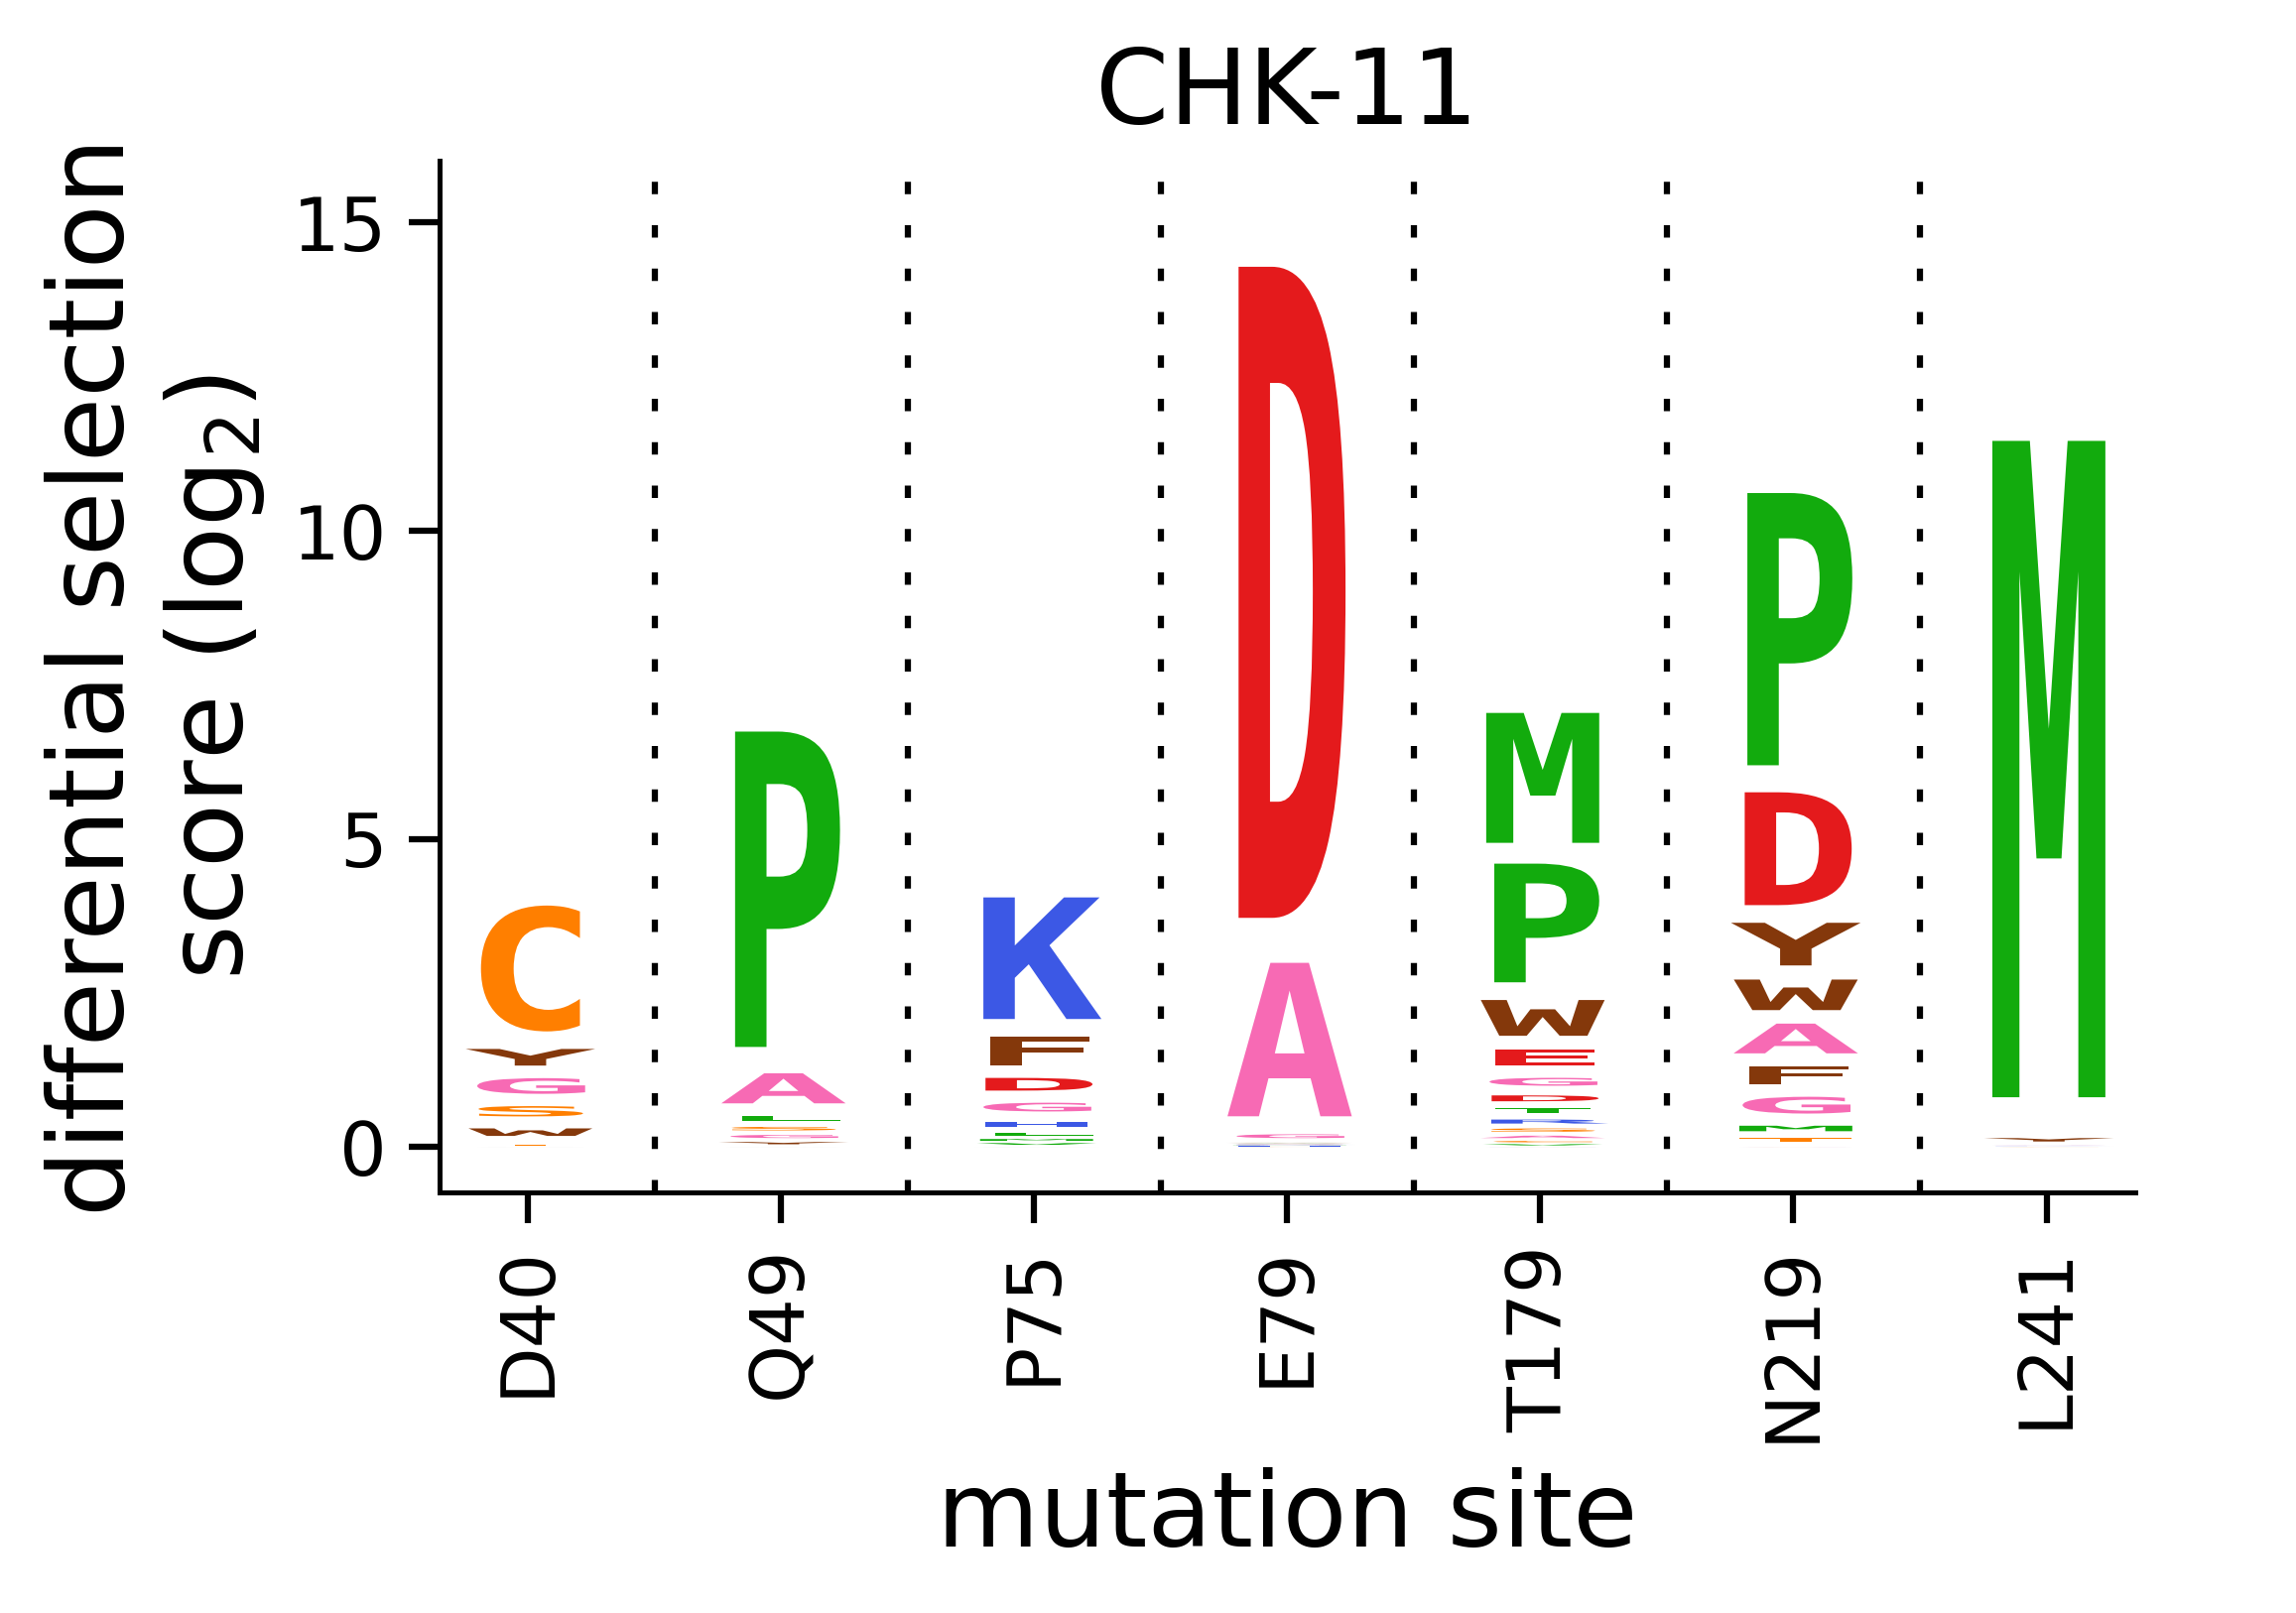

In [42]:
# Export image to png file
outputdir = "output_files"
os.makedirs(outputdir, exist_ok=True)
pngfile = os.path.join(outputdir, "chk11_all_newaxis.png")

print(f"Saving figure to {pngfile}")
fig.savefig(pngfile, dpi=450, bbox_inches="tight")

print(f"Here is a rendering of the saved figure:")
display(Image(pngfile, width=200))

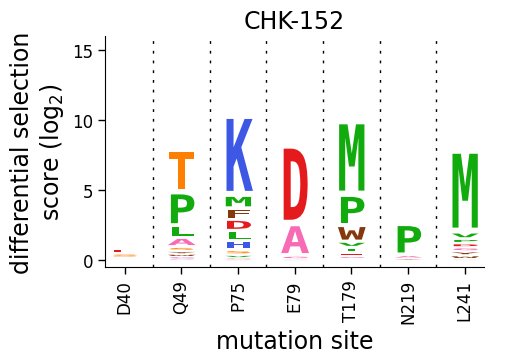

In [43]:
fig, axes = dmslogo.draw_logo(
        data=zoomed_df_152,
        x_col='site',
        letter_col='mutation',
        letter_height_col='mutdiffsel',
        addbreaks=True,
        xtick_col='site_label',
        ylabel = 'differential selection\nscore (log$_{2}$)',
        xlabel = 'mutation site',
        title = "CHK-152",
        ylim_setter = ylim_setter
        # colorscheme = colorwheel
    )

Saving figure to output_files/chk152_all_newaxis.png
Here is a rendering of the saved figure:

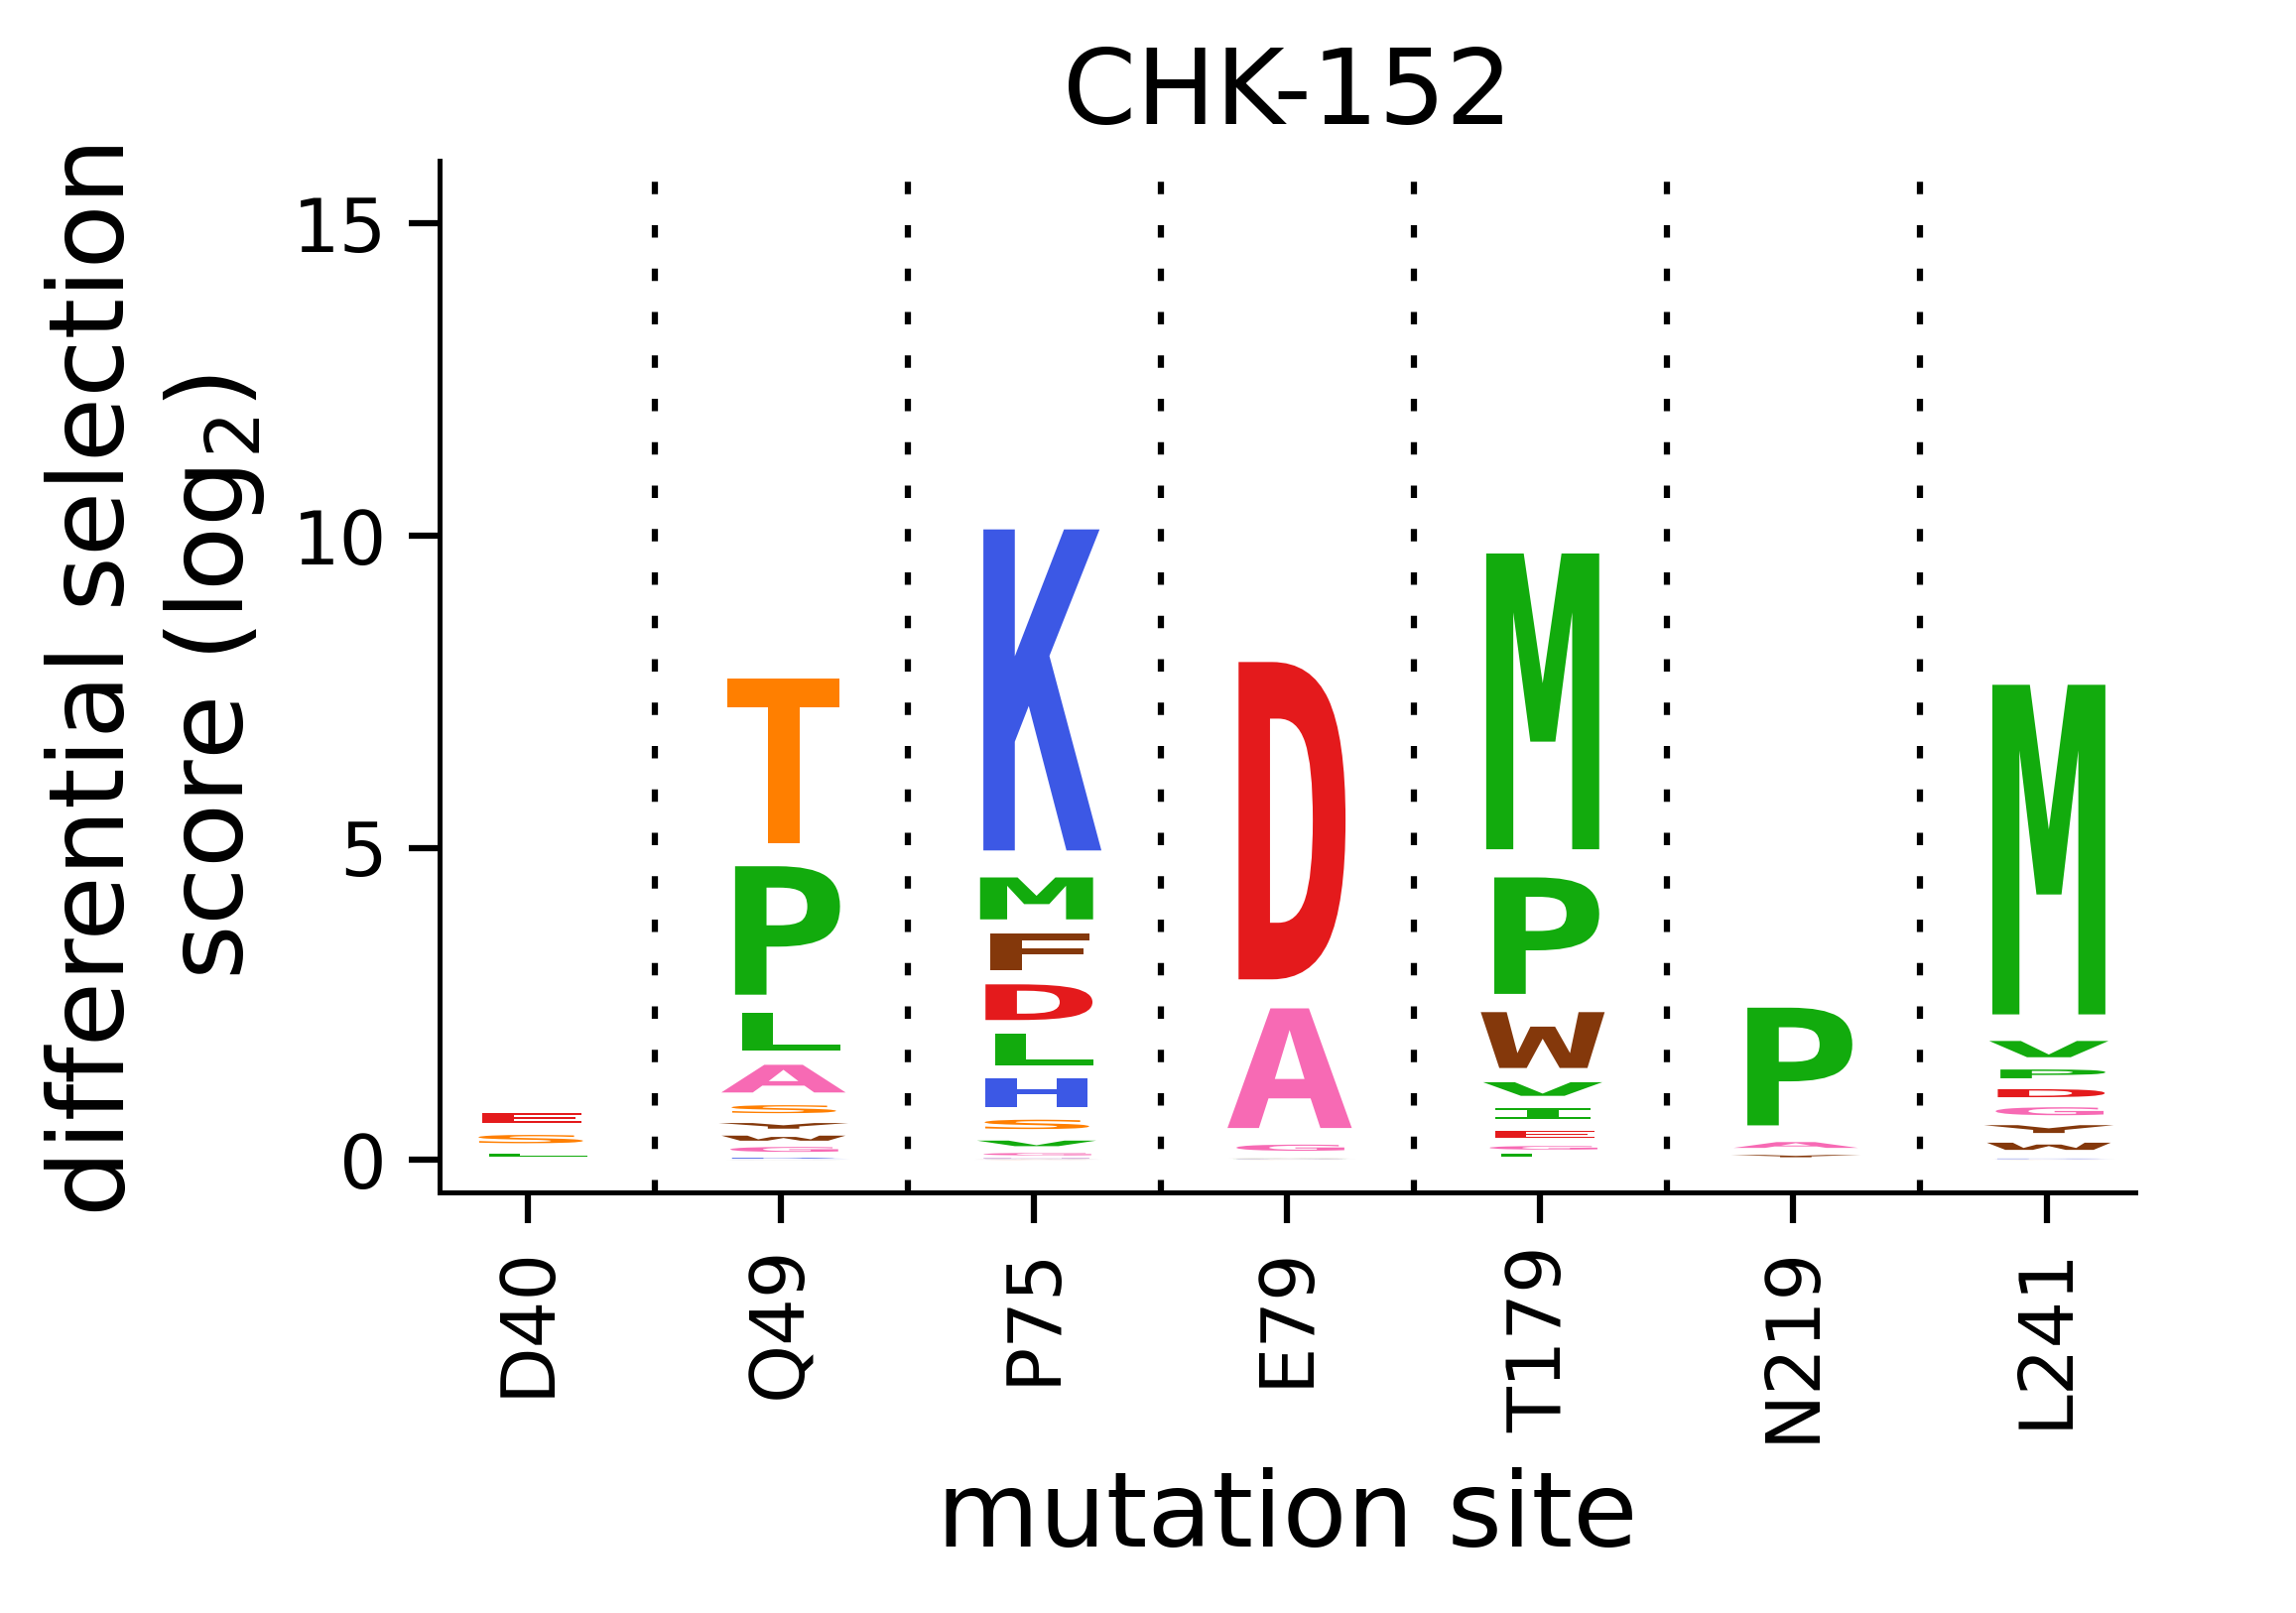

In [44]:
outputdir = "output_files"
os.makedirs(outputdir, exist_ok=True)
pngfile = os.path.join(outputdir, "chk152_all_newaxis.png")

print(f"Saving figure to {pngfile}")
fig.savefig(pngfile, dpi=450, bbox_inches="tight")

print(f"Here is a rendering of the saved figure:")
display(Image(pngfile, width=200))

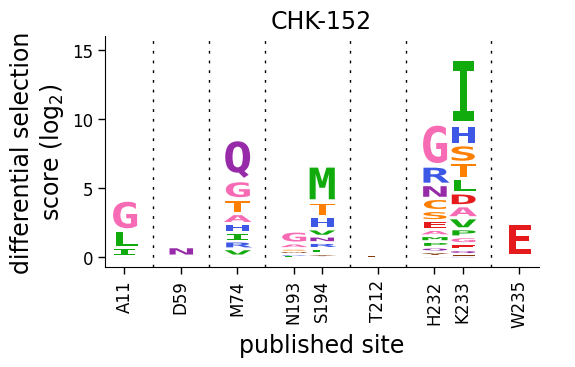

In [45]:
fig, axes = dmslogo.draw_logo(
        data=contacts_df_152,
        x_col='site',
        letter_col='mutation',
        letter_height_col='mutdiffsel',
        addbreaks=True,
        xtick_col='site_label',
        ylabel = 'differential selection\nscore (log$_{2}$)',
        xlabel = 'published site',
        title = "CHK-152",
        ylim_setter = ylim_setter
        # colorscheme = colorwheel
    )

Saving figure to output_files/chk152_contacts_newaxis.png
Here is a rendering of the saved figure:

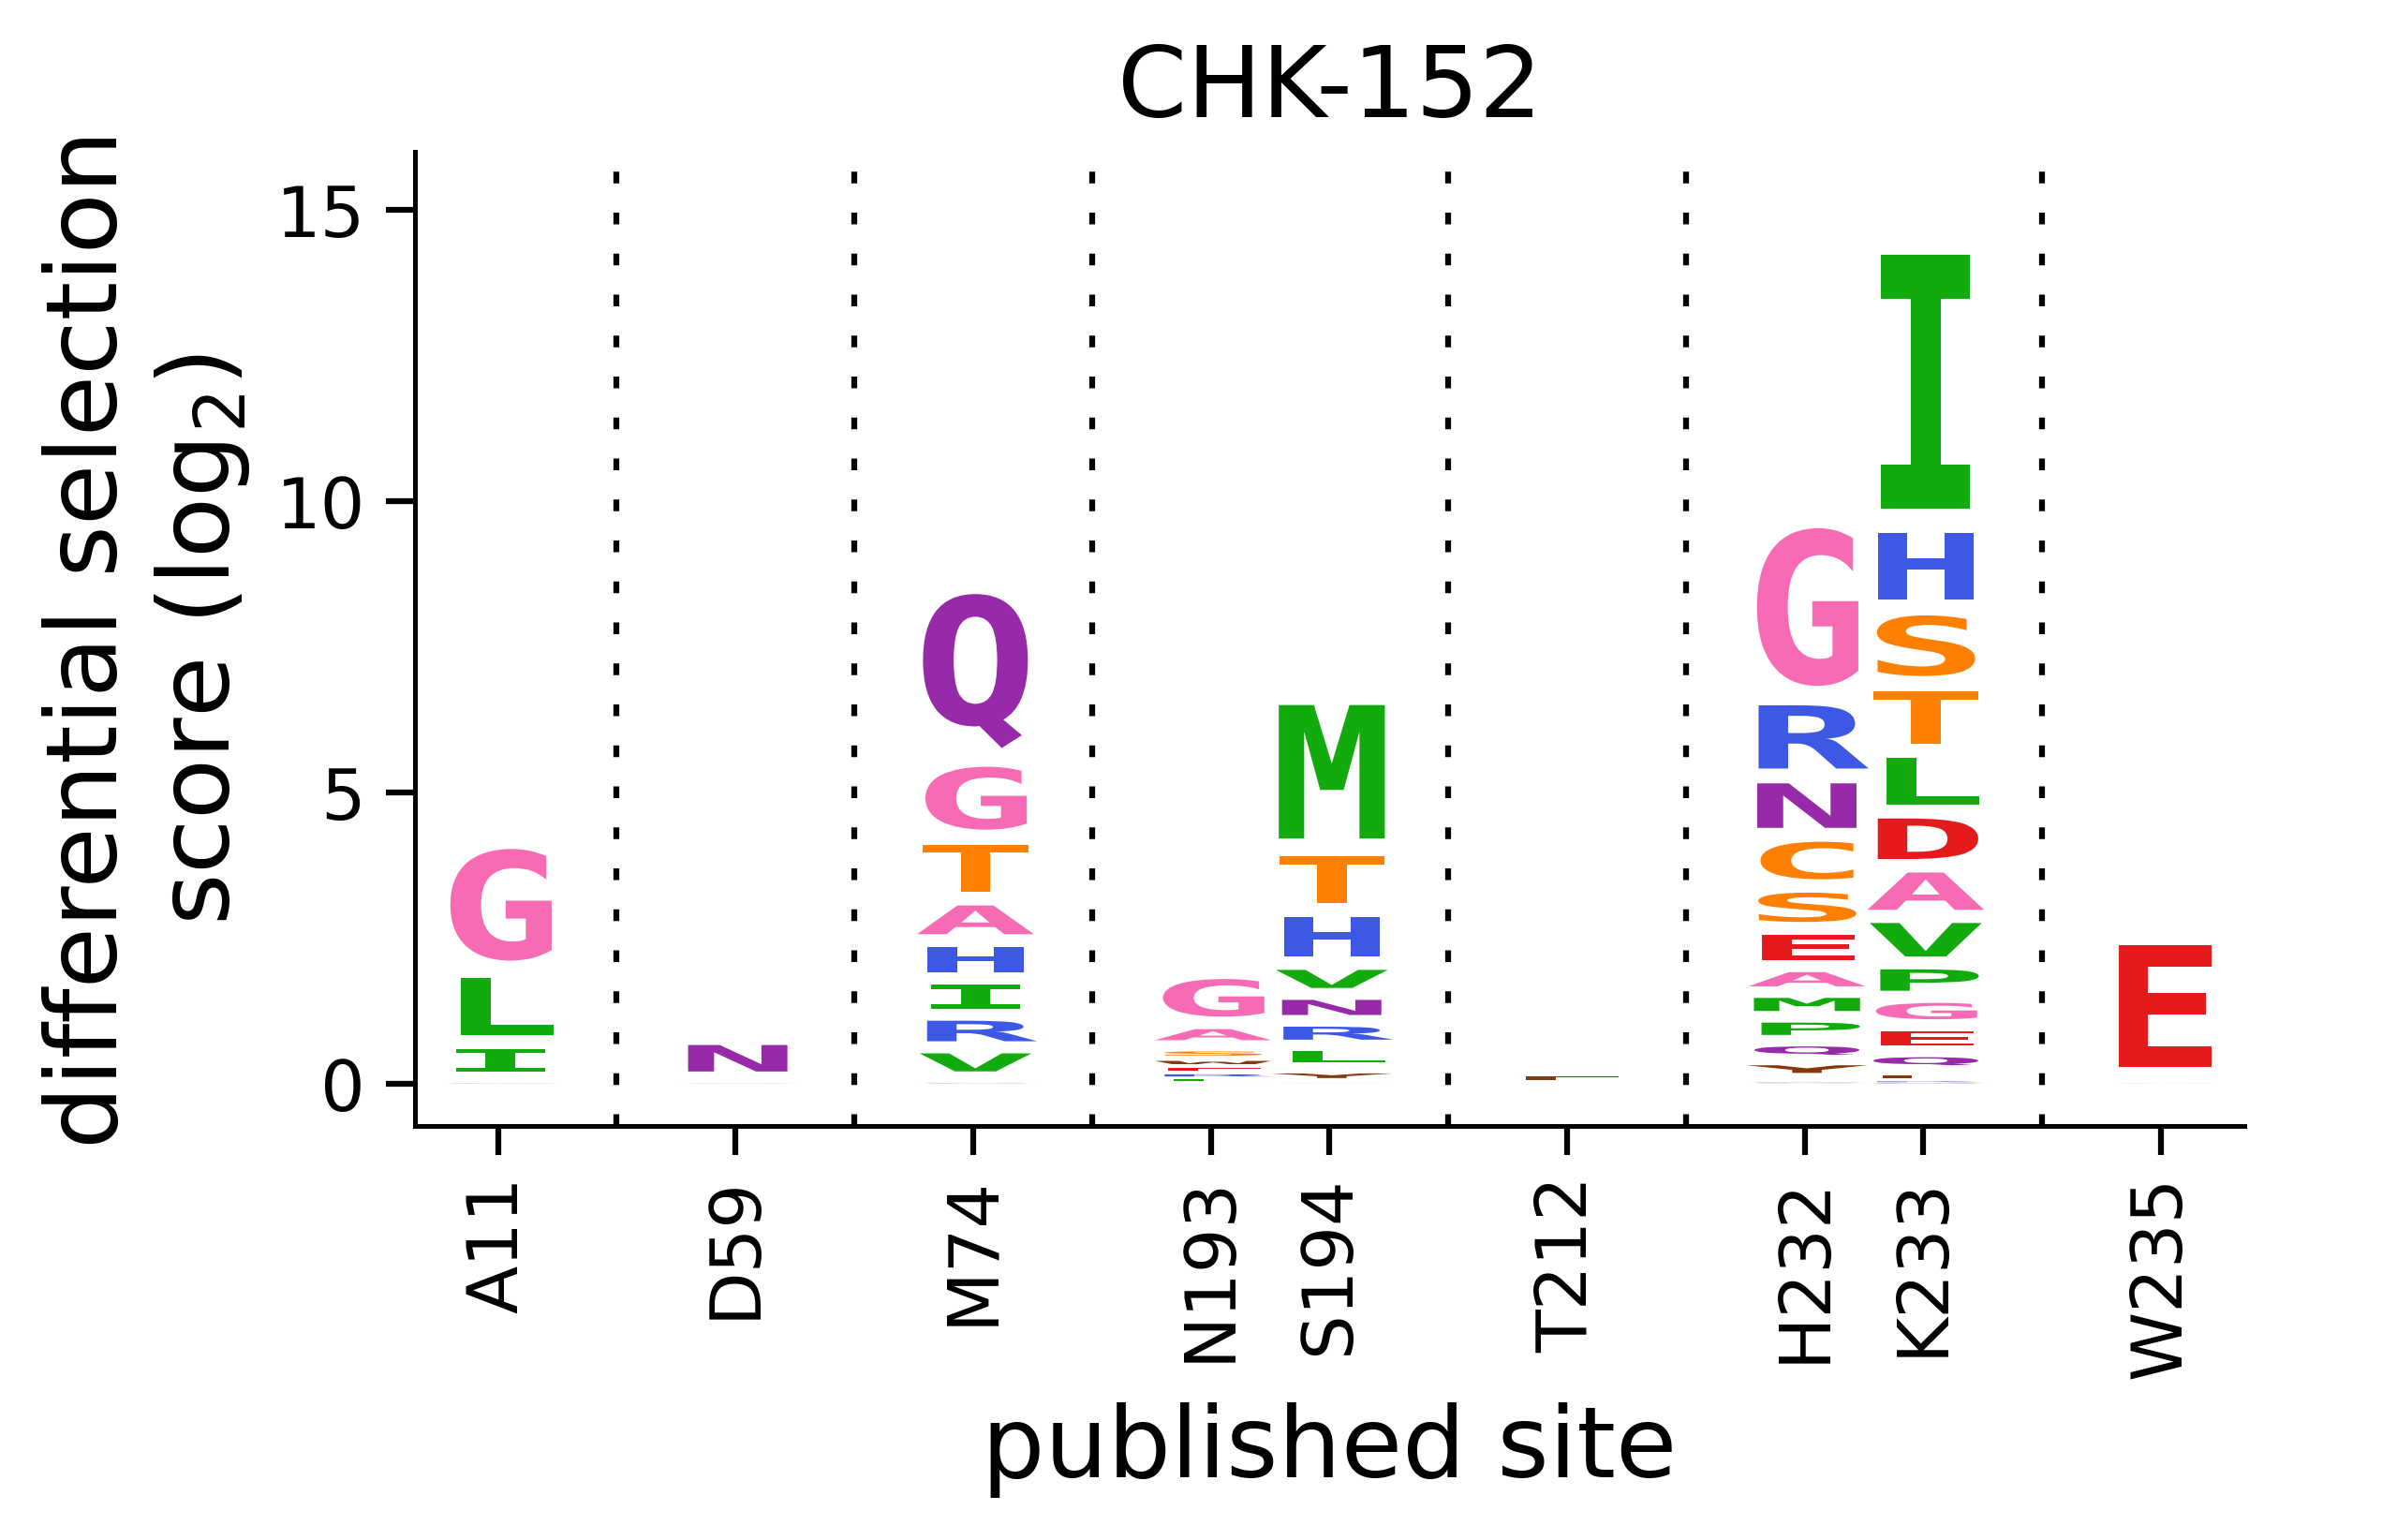

In [46]:
# Export image to png file
outputdir = "output_files"
os.makedirs(outputdir, exist_ok=True)
pngfile = os.path.join(outputdir, "chk152_contacts_newaxis.png")

print(f"Saving figure to {pngfile}")
fig.savefig(pngfile, dpi=450, bbox_inches="tight")

print(f"Here is a rendering of the saved figure:")
display(Image(pngfile, width=200))

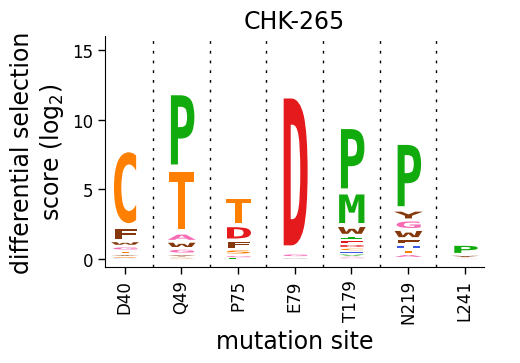

In [47]:
fig, axes = dmslogo.draw_logo(
        data=zoomed_df_265,
        x_col='site',
        letter_col='mutation',
        letter_height_col='mutdiffsel',
        addbreaks=True,
        xtick_col='site_label',
        ylabel = 'differential selection\nscore (log$_{2}$)',
        xlabel = 'mutation site',
        title = "CHK-265",
        ylim_setter = ylim_setter
        # colorscheme = colorwheel
    )

Saving figure to output_files/chk265_all_newaxis.png
Here is a rendering of the saved figure:

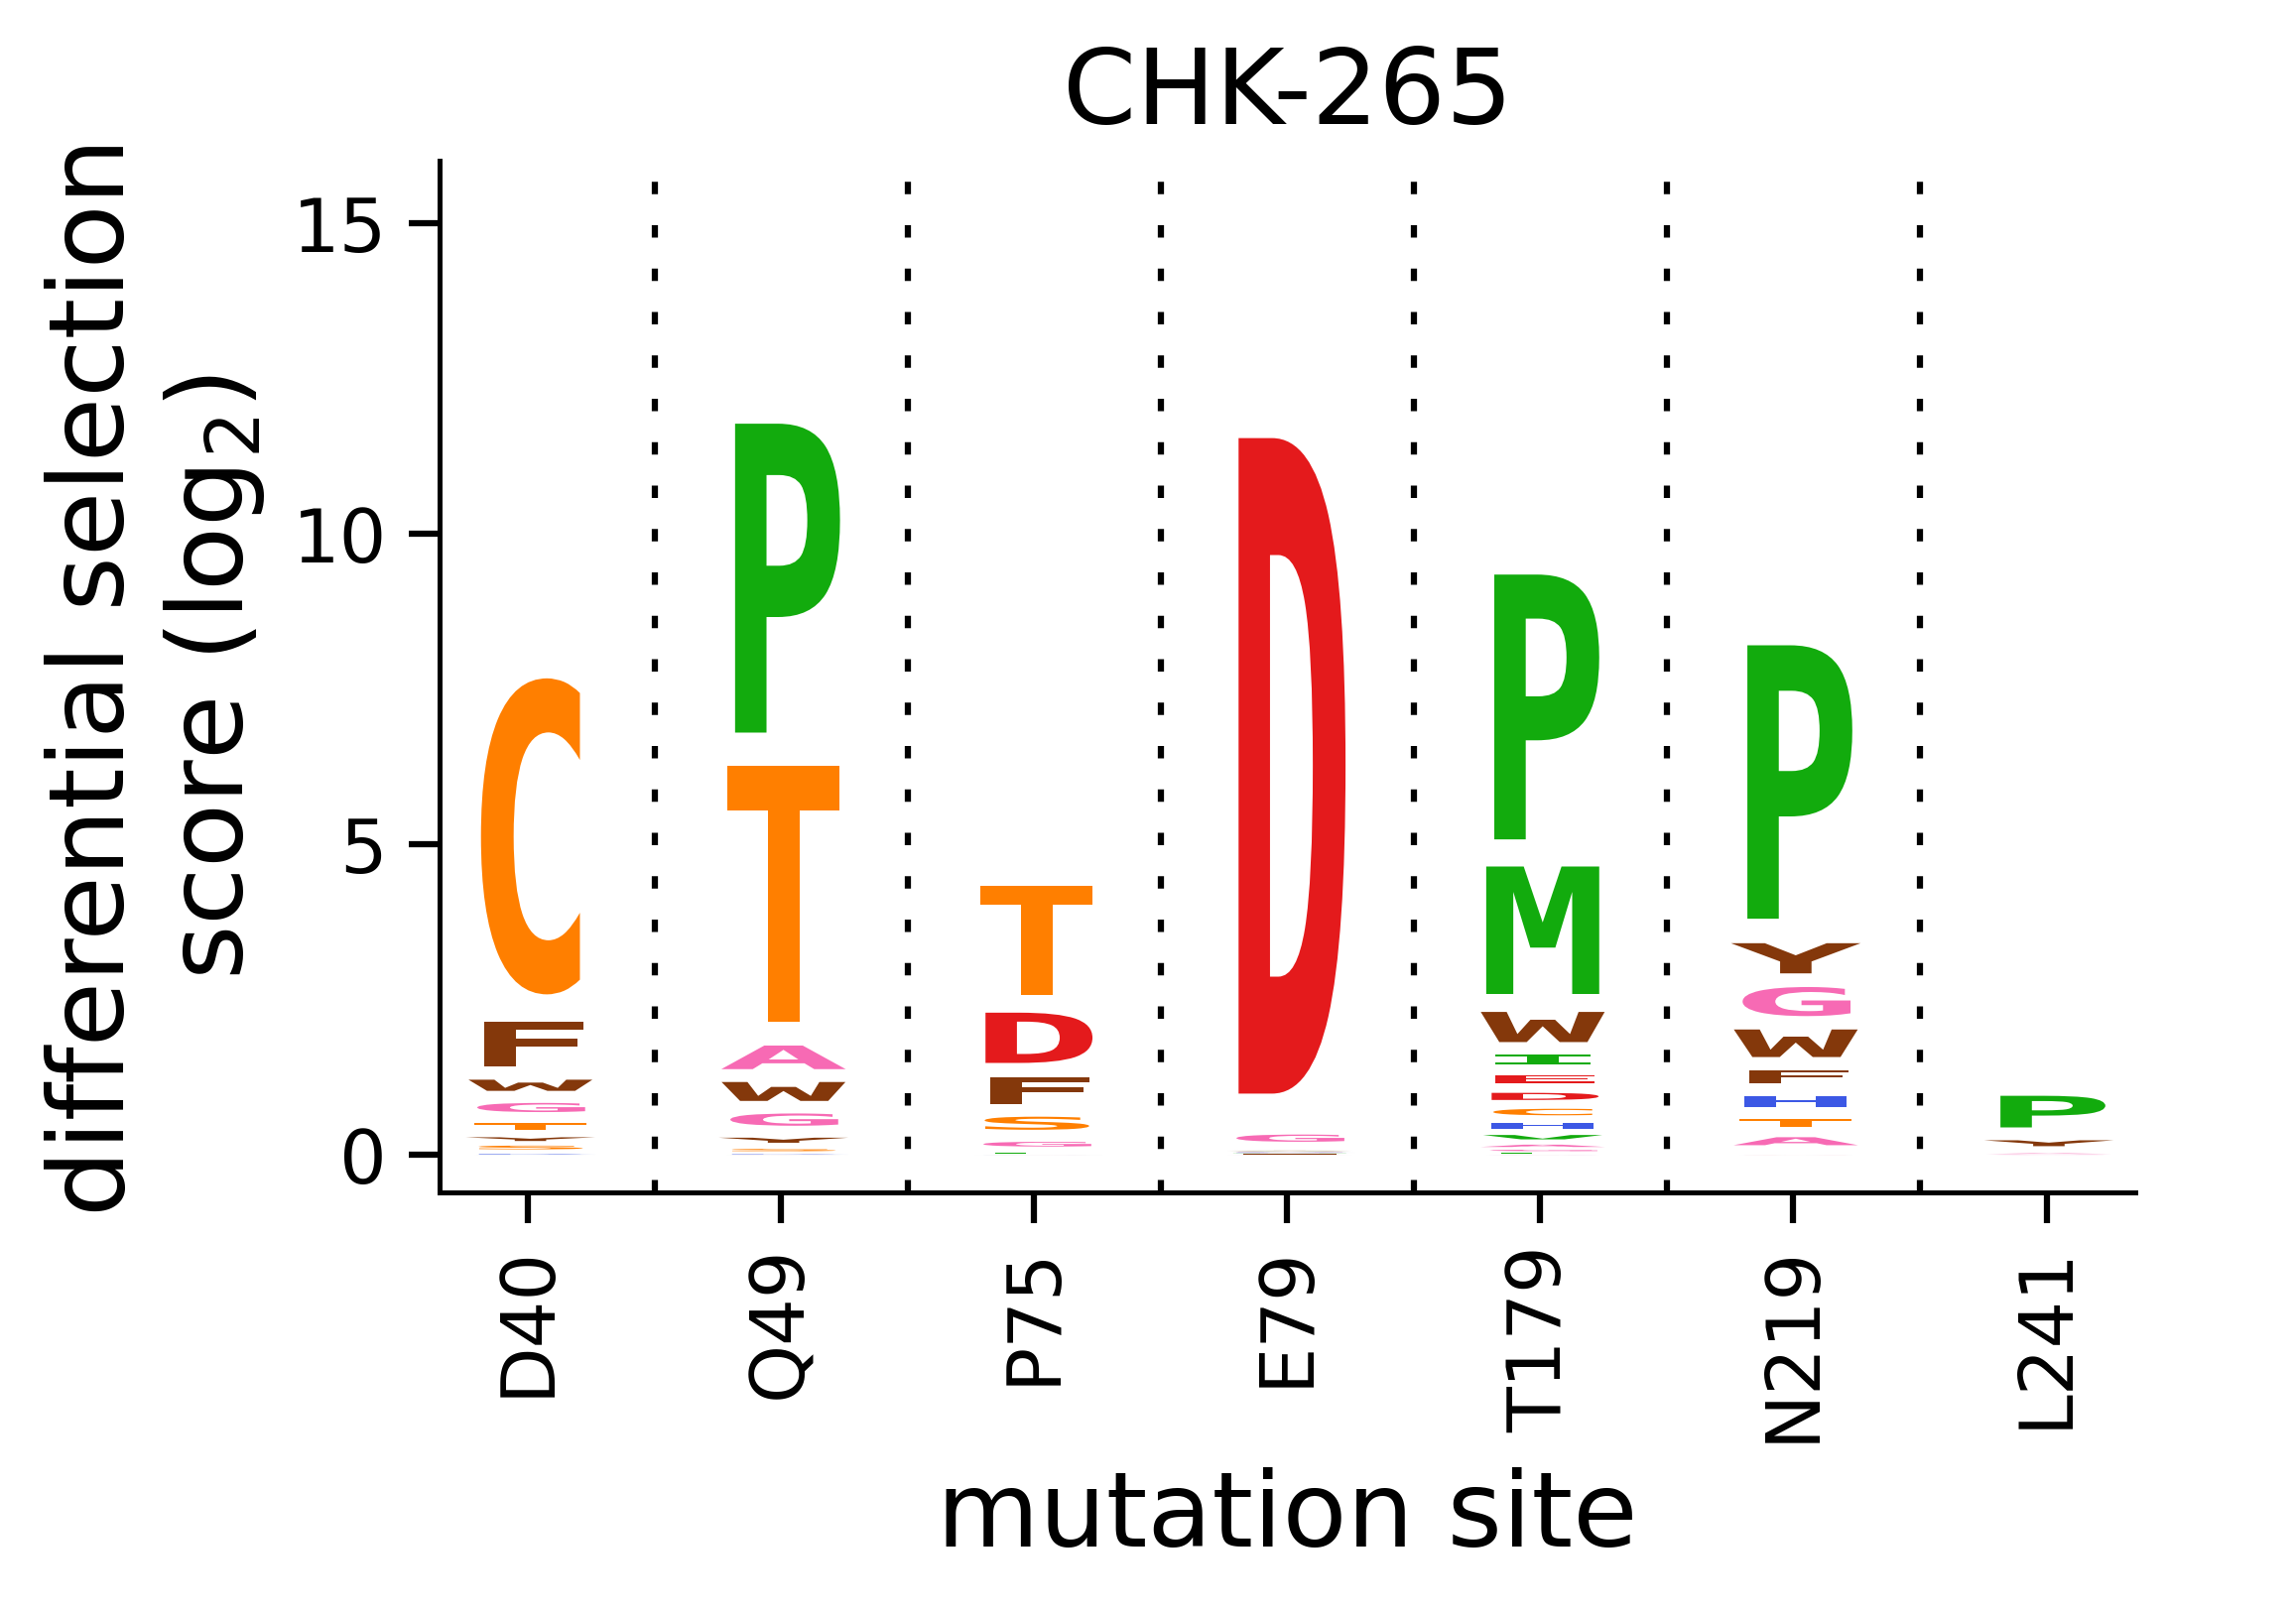

In [48]:
outputdir = "output_files"
os.makedirs(outputdir, exist_ok=True)
pngfile = os.path.join(outputdir, "chk265_all_newaxis.png")

print(f"Saving figure to {pngfile}")
fig.savefig(pngfile, dpi=450, bbox_inches="tight")

print(f"Here is a rendering of the saved figure:")
display(Image(pngfile, width=200))

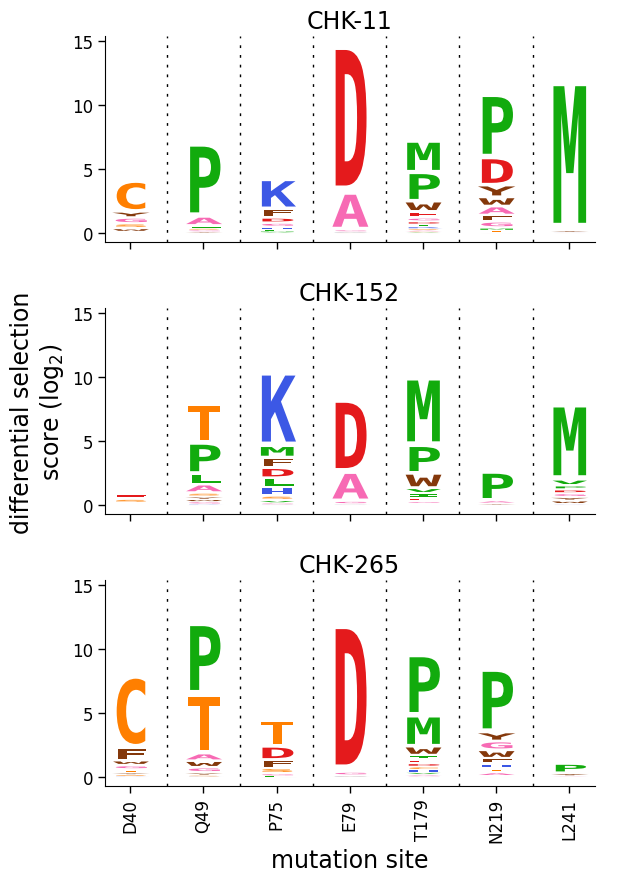

In [49]:
# Combine into one plot
fig, axes = dmslogo.facet_plot(
    data = zoomed_df_concat,
    gridrow_col = "antibody",
    x_col = "site",
    show_col = None,
    draw_logo_kwargs={
        "letter_col": "mutation",
        "letter_height_col": "mutdiffsel",
        "xtick_col": "site_label",
        "xlabel": "mutation site",
        "ylabel": "differential selection\nscore (log$_{2}$)",
        "clip_negative_heights": True,
    },
    share_ylabel = True,
    share_xlabel = True,
    share_ylim_across_rows = True,
)

Saving figure to output_files/zoomed_concat_newaxis.png
Here is a rendering of the saved figure:

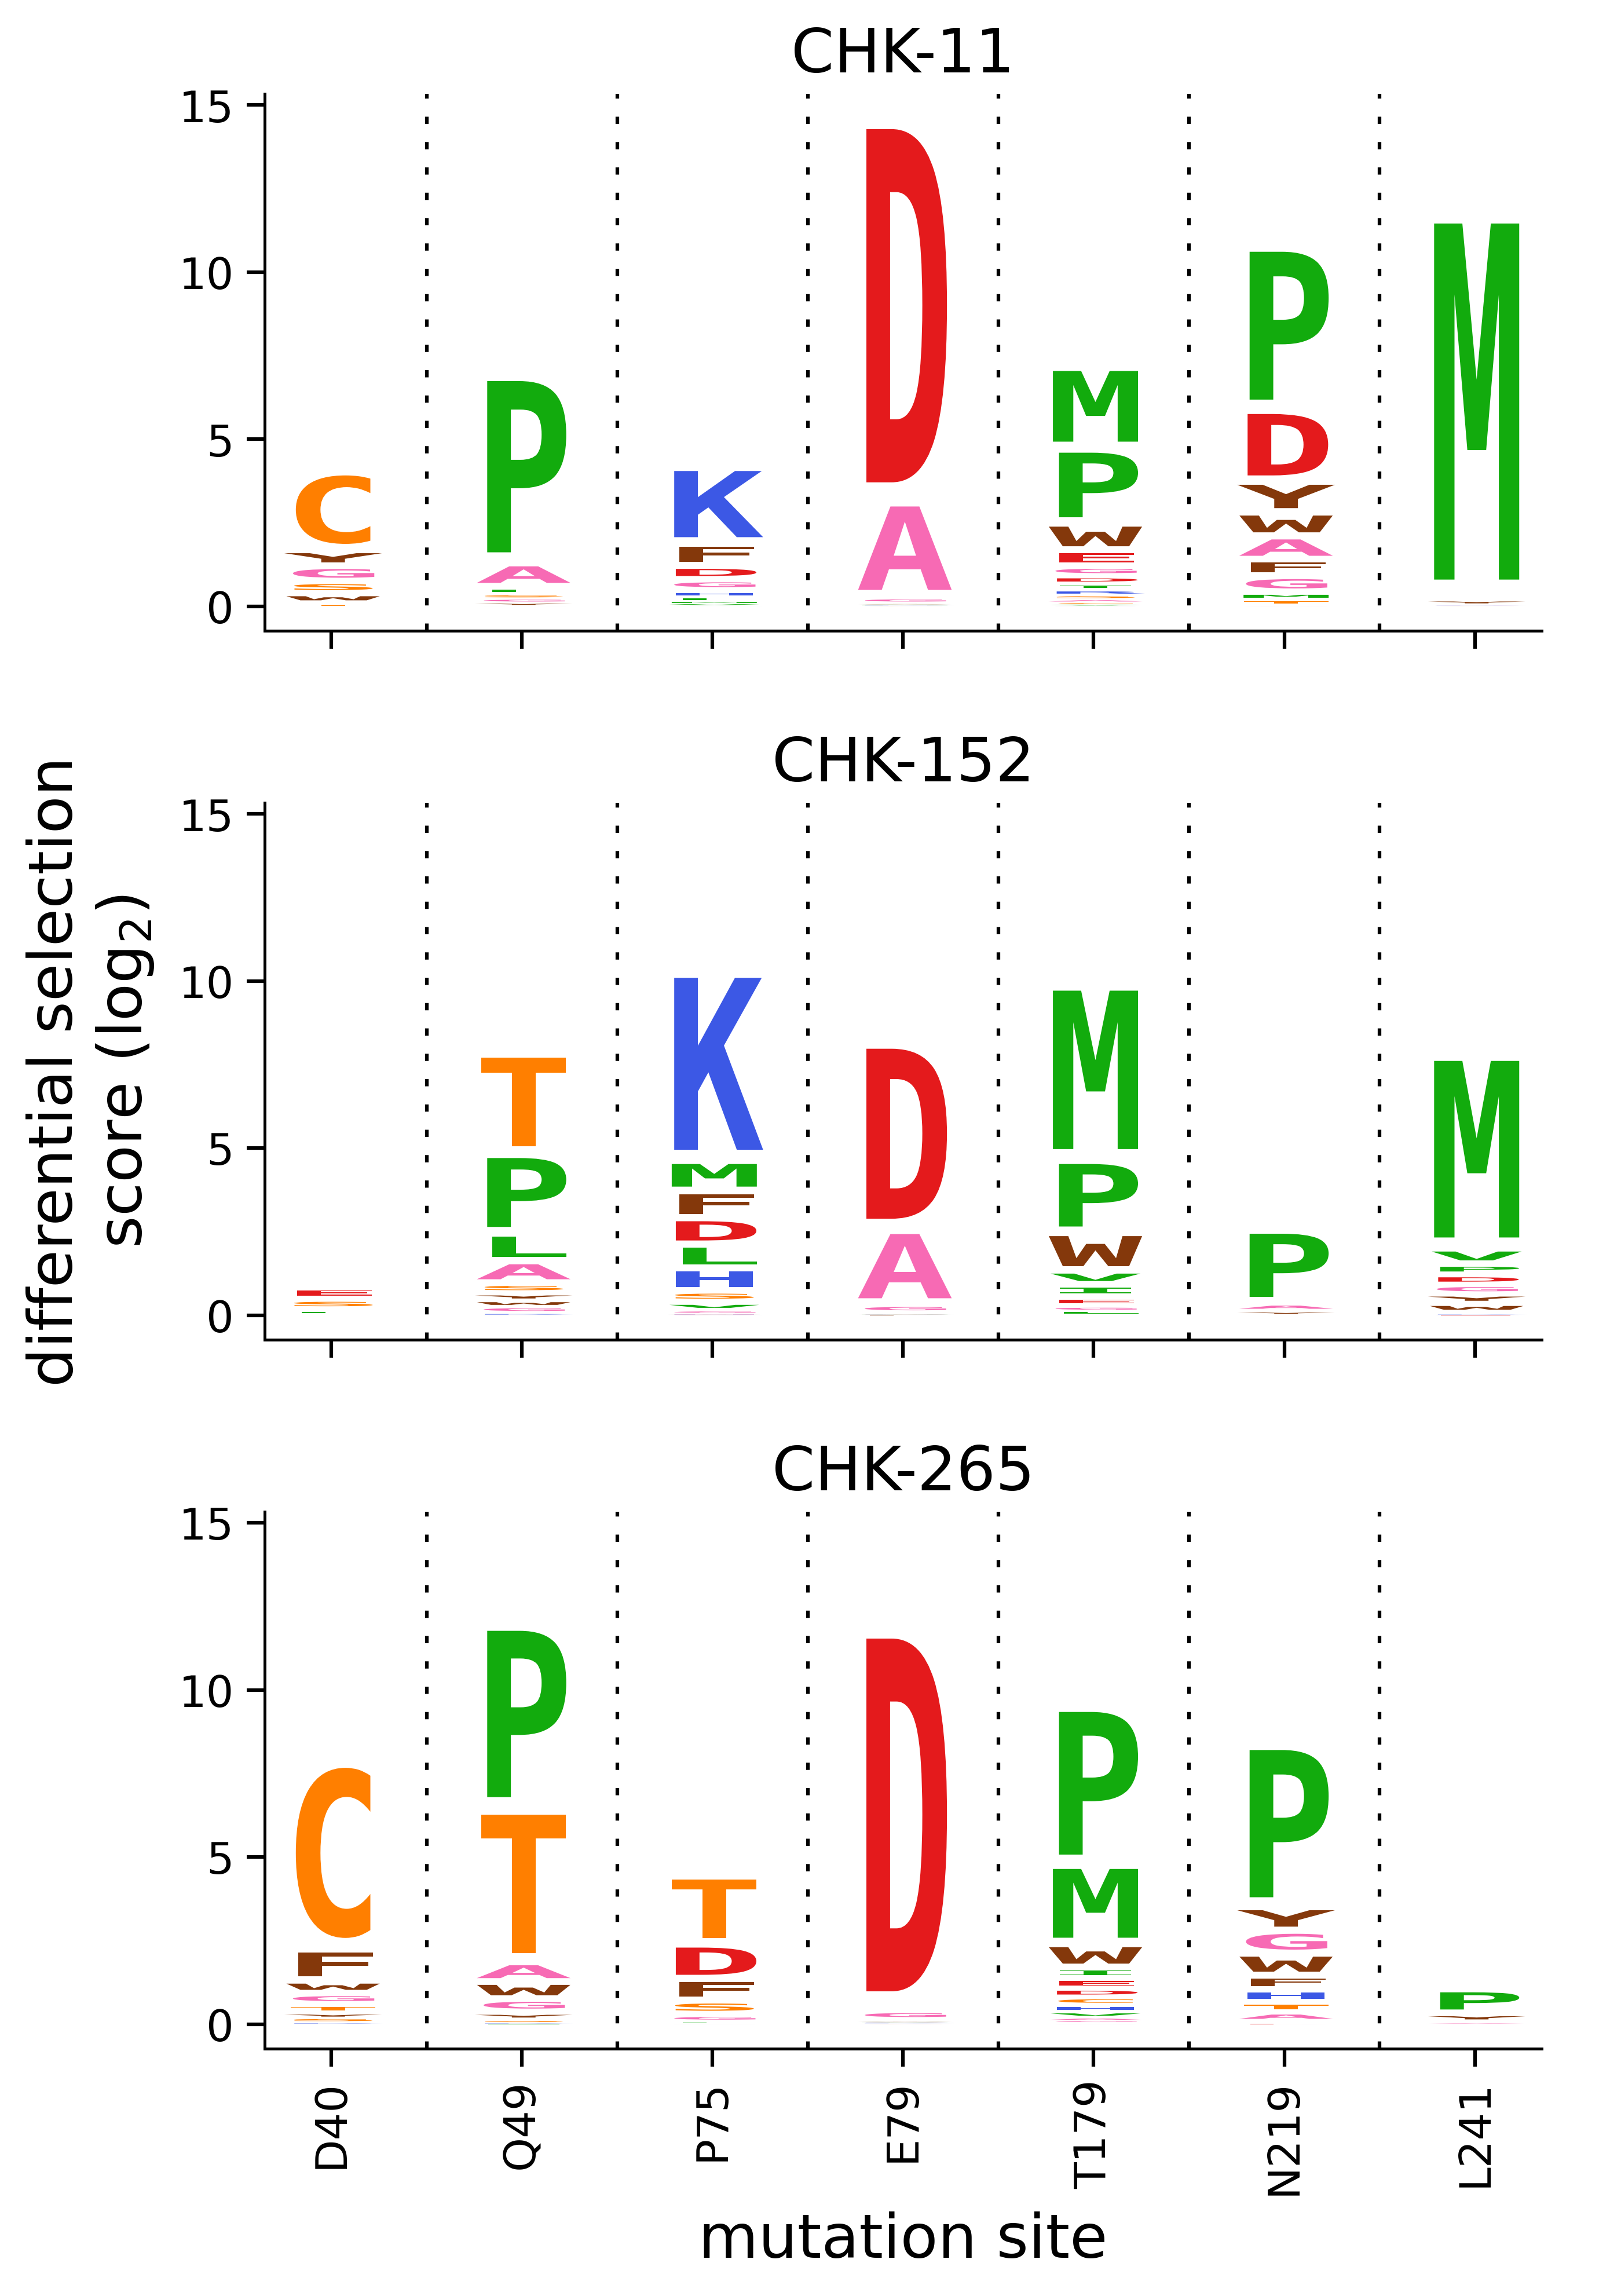

In [50]:
outputdir = "output_files"
os.makedirs(outputdir, exist_ok=True)
pngfile = os.path.join(outputdir, "zoomed_concat_newaxis.png")

print(f"Saving figure to {pngfile}")
fig.savefig(pngfile, dpi=450, bbox_inches="tight")

print(f"Here is a rendering of the saved figure:")
display(Image(pngfile, width=200))

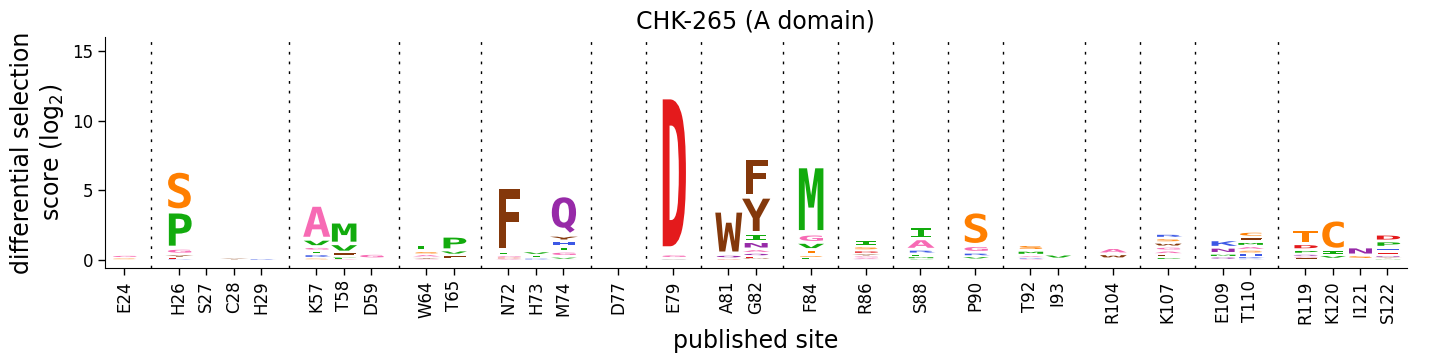

In [51]:
fig, axes = dmslogo.draw_logo(
        data=contacts_df_265_adom,
        x_col='site',
        letter_col='mutation',
        letter_height_col='mutdiffsel',
        addbreaks=True,
        xtick_col='site_label',
        ylabel = 'differential selection\nscore (log$_{2}$)',
        xlabel = 'published site',
        title = "CHK-265 (A domain)",
        ylim_setter = ylim_setter
        # colorscheme = colorwheel
    )

Saving figure to output_files/chk265_contacts_adom_newaxis.png
Here is a rendering of the saved figure:

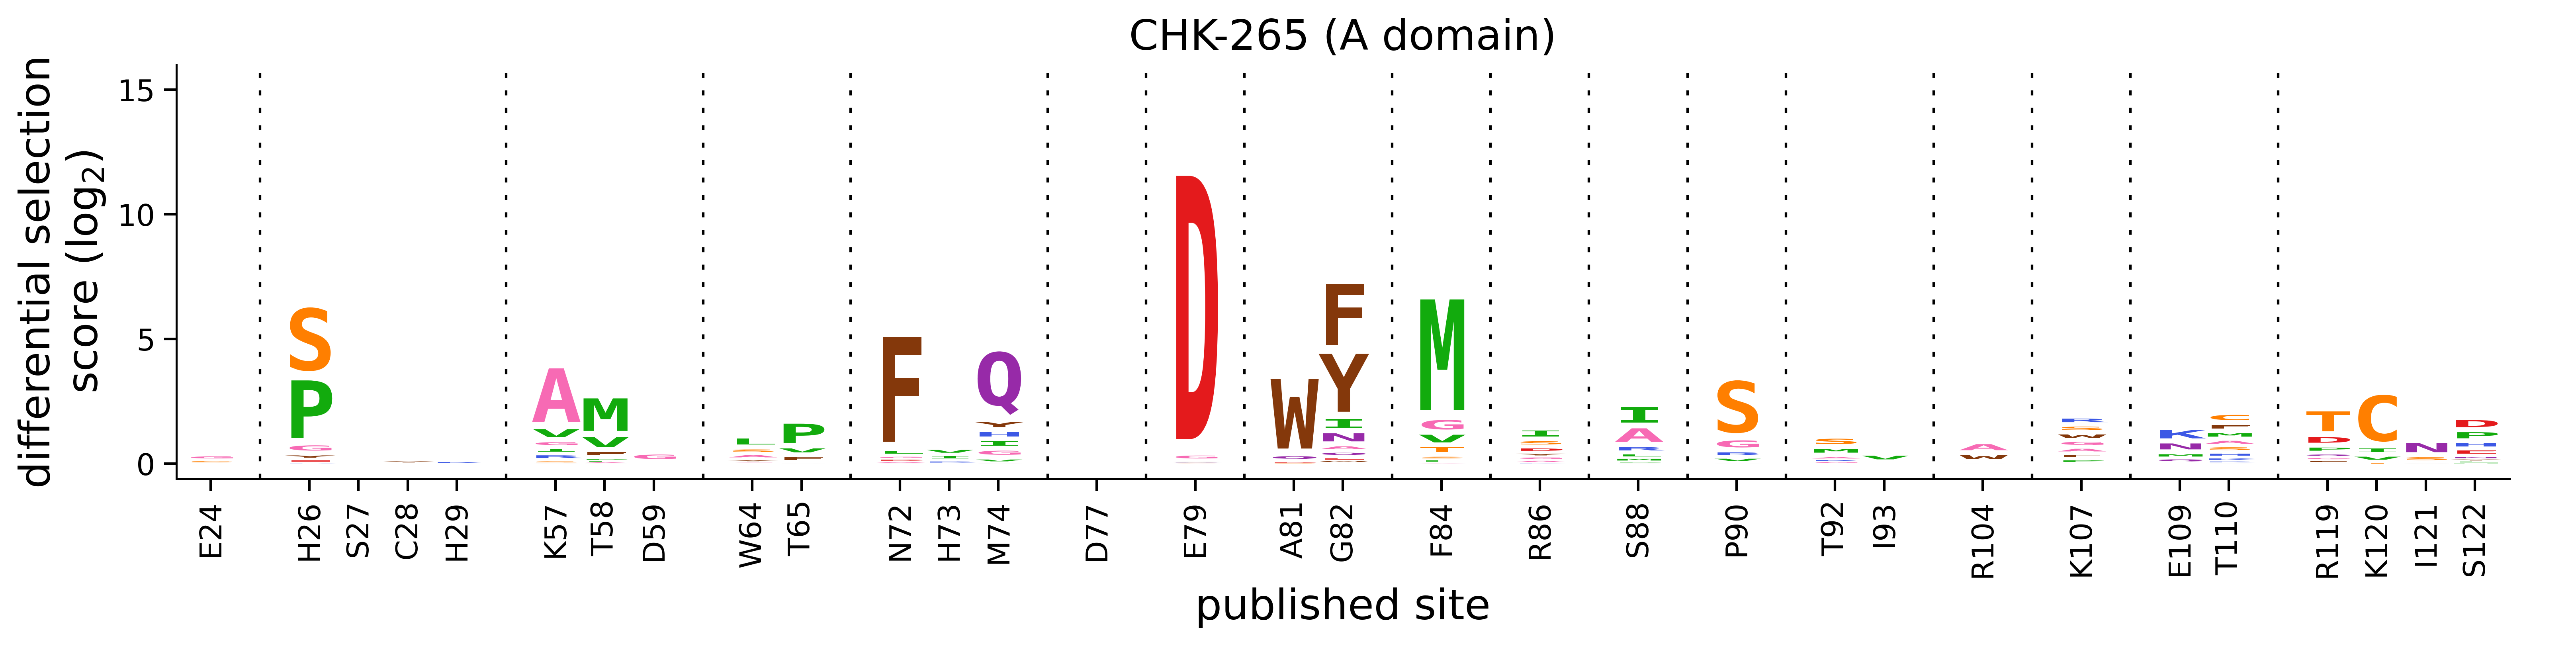

In [52]:
outputdir = "output_files"
os.makedirs(outputdir, exist_ok=True)
pngfile = os.path.join(outputdir, "chk265_contacts_adom_newaxis.png")

print(f"Saving figure to {pngfile}")
fig.savefig(pngfile, dpi=450, bbox_inches="tight")

print(f"Here is a rendering of the saved figure:")
display(Image(pngfile, width=200))

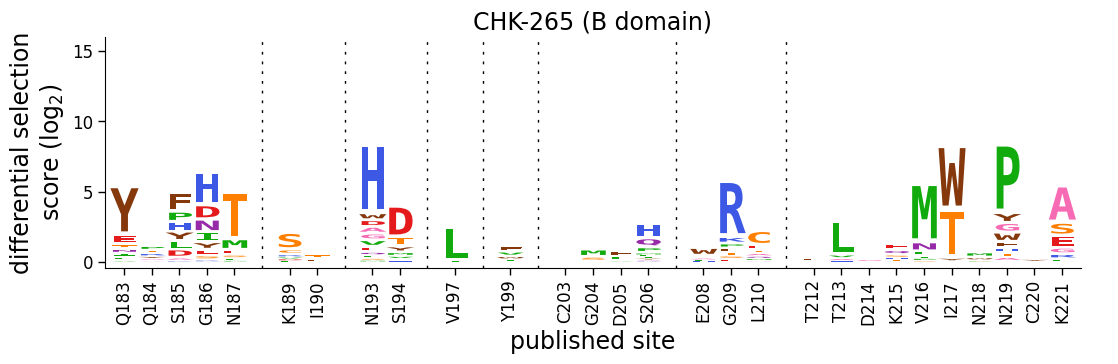

In [53]:
fig, axes = dmslogo.draw_logo(
        data=contacts_df_265_bdom,
        x_col='site',
        letter_col='mutation',
        letter_height_col='mutdiffsel',
        addbreaks=True,
        xtick_col='site_label',
        ylabel = 'differential selection\nscore (log$_{2}$)',
        xlabel = 'published site',
        title = "CHK-265 (B domain)",
        ylim_setter = ylim_setter
        # colorscheme = colorwheel
    )

Saving figure to output_files/chk265_contacts_bdom_newaxis.png
Here is a rendering of the saved figure:

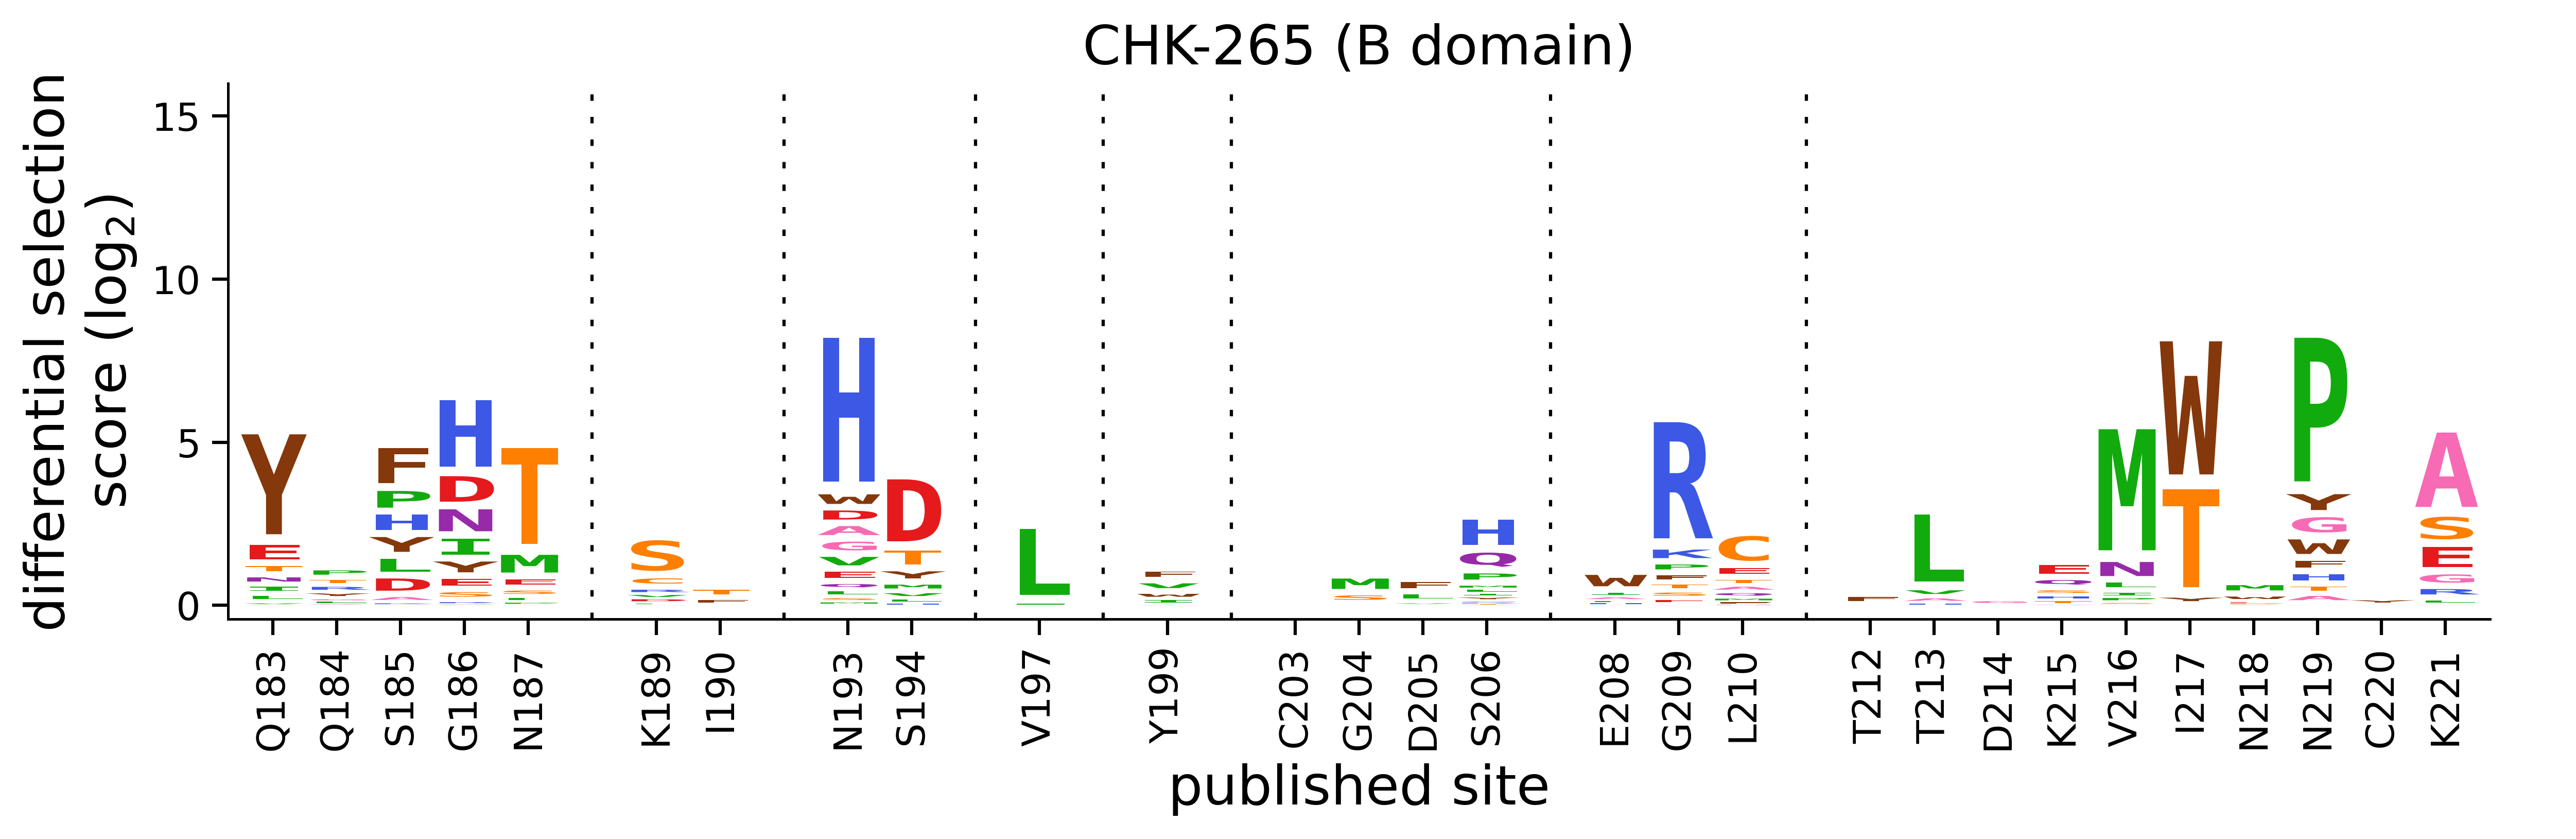

In [54]:
outputdir = "output_files"
os.makedirs(outputdir, exist_ok=True)
pngfile = os.path.join(outputdir, "chk265_contacts_bdom_newaxis.png")

print(f"Saving figure to {pngfile}")
fig.savefig(pngfile, dpi=450, bbox_inches="tight")

print(f"Here is a rendering of the saved figure:")
display(Image(pngfile, width=200))